## Using BigQuery to perform basic data analytics <a class="anchor" id="sections"></a>

- San Francisco Bikeshares dataset: a bikeshare program in San Francisco

#### Contents 

- [1. Getting Started](#section1)
- [2. View Table Schema](#section2)
- [3. Data Exploration](#section3)

### 1. Getting Started<a class="anchor" id="section1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from google.cloud import bigquery

%config InlineBackend.figure_format = 'retina'
%load_ext google.cloud.bigquery

#### Functions

In [2]:
def view_tables(dataset):
    ## Lists the tables in the dataset
    tables = list(client.list_tables(dataset))
    for table in tables: print(table.table_id)

def get_schema(table):
    ## Retreives the table schema as a printed object
    return(client.get_table(table).schema)

def query_to_df(query):
    ## View query results as a pandas dataframe
    return(client.query(query).result().to_dataframe())

def view_dataframe(table, n):
    ## View the first n rows of table as a pandas dataframe
    return(client.list_rows(table, max_results=n).to_dataframe())

In [3]:
## File with authentication key info
JSON_FILE_NAME='####.json'

## Client
client = bigquery.Client.from_service_account_json(JSON_FILE_NAME)

In [4]:
## View dataset tables 
dataset = 'bigquery-public-data.san_francisco_bikeshare'
view_tables(dataset)

bikeshare_regions
bikeshare_station_info
bikeshare_station_status
bikeshare_trips


`Every dataset is just a collection of tables. A dataset can be thought of as a spreadsheet file containing multiple tables composed of rows & columns.`


`There are four tables in the San Francisco Bikeshare dataset. As a first step, investigate the schema of all these tables & consider where tables can be joined for future queries.`

### 2. View Table Schema<a class="anchor" id="section2"></a>

- Using `get_schema()` funciton

#### 2-1. Table: bikeshare_regions

In [5]:
table = 'bigquery-public-data.san_francisco_bikeshare.bikeshare_regions'
get_schema(table)

[SchemaField('region_id', 'INTEGER', 'REQUIRED', 'Unique identifier for the region', (), None),
 SchemaField('name', 'STRING', 'REQUIRED', 'Public name for this region', (), None)]

In [6]:
## View first n rows of table
print(f"> Table: {table[45:]}")
view_dataframe(table, 3)

> Table: bikeshare_regions


,region_id,name
0,3,San Francisco
1,5,San Jose
2,12,Oakland


#### 2-2. Table: bikeshare_station_info

In [7]:
table = 'bigquery-public-data.san_francisco_bikeshare.bikeshare_station_info'
get_schema(table)

[SchemaField('station_id', 'STRING', 'REQUIRED', 'Unique identifier of a station.', (), None),
 SchemaField('name', 'STRING', 'REQUIRED', 'Public name of the station', (), None),
 SchemaField('short_name', 'STRING', 'NULLABLE', 'Short name or other type of identifier, as used by the data publisher', (), None),
 SchemaField('lat', 'FLOAT', 'REQUIRED', 'The latitude of station. The field value must be a valid WGS 84 latitude in decimal degrees format. See: http://en.wikipedia.org/wiki/World_Geodetic_System, https://en.wikipedia.org/wiki/Decimal_degrees', (), None),
 SchemaField('lon', 'FLOAT', 'REQUIRED', 'The longitude of station. The field value must be a valid WGS 84 longitude in decimal degrees format. See: http://en.wikipedia.org/wiki/World_Geodetic_System, https://en.wikipedia.org/wiki/Decimal_degrees', (), None),
 SchemaField('region_id', 'INTEGER', 'NULLABLE', 'ID of the region where station is located', (), None),
 SchemaField('rental_methods', 'STRING', 'NULLABLE', 'Array of en

In [8]:
## View first n rows of table
print(f"> Table: {table[45:]}")
view_dataframe(table, 3)

> Table: bikeshare_station_info


,station_id,name,short_name,lat,lon,region_id,rental_methods,capacity,external_id,eightd_has_key_dispenser,has_kiosk,station_geom
0,578,Hearst Ave at Detroit St,SF-X16,37.730759,-122.444194,<NA>,"['CREDITCARD', 'KEY']",19,41b2200f-7915-410b-95c6-084bc4d3dee8,False,True,POINT(-122.444193922092 37.7307594397276)
1,577,Divisadero St at Lombard St,SF-C18,37.799175,-122.442729,<NA>,"['CREDITCARD', 'KEY']",22,82ad4cff-001f-49a8-88fa-a5a63d64b9a2,False,True,POINT(-122.442729156519 37.7991751126346)
2,73f89d7b-016f-425d-8436-617fa0e977fc,Howard St at Grace St,SF-K24-2,37.774479,-122.413914,0,"['KEY', 'CREDITCARD']",12,73f89d7b-016f-425d-8436-617fa0e977fc,False,True,POINT(-122.413914222398 37.7744791035262)


#### 2-3. Table: bikeshare_station_status

In [9]:
table = 'bigquery-public-data.san_francisco_bikeshare.bikeshare_station_status'
get_schema(table)

[SchemaField('station_id', 'STRING', 'REQUIRED', 'Unique identifier of a station', (), None),
 SchemaField('num_bikes_available', 'INTEGER', 'REQUIRED', 'Number of bikes available for rental', (), None),
 SchemaField('num_bikes_disabled', 'INTEGER', 'NULLABLE', 'Number of disabled bikes at the station. Vendors who do not want to publicize the number of disabled bikes or docks in their system can opt to omit station capacity (in station_information), num_bikes_disabled and num_docks_disabled. If station capacity is published then broken docks/bikes can be inferred (though not specifically whether the decreased capacity is a broken bike or dock)', (), None),
 SchemaField('num_docks_available', 'INTEGER', 'REQUIRED', 'Number of docks accepting bike returns', (), None),
 SchemaField('num_docks_disabled', 'INTEGER', 'NULLABLE', 'Number of empty but disabled dock points at the station. This value remains as part of the spec as it is possibly useful during development', (), None),
 SchemaFiel

In [10]:
## View first n rows of table
print(f"> Table: {table[45:]}")
view_dataframe(table, 3)

> Table: bikeshare_station_status


,station_id,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_installed,is_renting,is_returning,last_reported,num_ebikes_available,eightd_has_available_keys
0,717e6e13-e1b2-4c13-944d-823a556c1635,14,1,0,0,True,True,True,1656374690,0,False
1,1af8f901-8697-4128-b6c8-45c7c7f2c684,15,0,0,0,True,True,True,1656374672,0,False
2,0b81b2ae-d9bf-4b66-b5e0-687205d4bc12,15,0,0,0,True,True,True,1656374638,0,False


#### 2-4. Table: bikeshare_trips

In [11]:
table = 'bigquery-public-data.san_francisco_bikeshare.bikeshare_trips'
get_schema(table)

[SchemaField('trip_id', 'STRING', 'REQUIRED', 'Numeric ID of bike trip', (), None),
 SchemaField('duration_sec', 'INTEGER', 'NULLABLE', 'Time of trip in seconds', (), None),
 SchemaField('start_date', 'TIMESTAMP', 'NULLABLE', 'Start date of trip with date and time, in PST', (), None),
 SchemaField('start_station_name', 'STRING', 'NULLABLE', 'Station name of start station', (), None),
 SchemaField('start_station_id', 'INTEGER', 'NULLABLE', 'Numeric reference for start station', (), None),
 SchemaField('end_date', 'TIMESTAMP', 'NULLABLE', 'End date of trip with date and time, in PST', (), None),
 SchemaField('end_station_name', 'STRING', 'NULLABLE', 'Station name for end station', (), None),
 SchemaField('end_station_id', 'INTEGER', 'NULLABLE', 'Numeric reference for end station', (), None),
 SchemaField('bike_number', 'INTEGER', 'NULLABLE', 'ID of bike used', (), None),
 SchemaField('zip_code', 'STRING', 'NULLABLE', 'Home zip code of subscriber (customers can choose to manually enter zi

In [12]:
## View first n rows of table
print(f"> Table: {table[45:]}")
view_dataframe(table, 3)

> Table: bikeshare_trips


,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,...,c_subscription_type,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_gender,bike_share_for_all_trip,start_station_geom,end_station_geom
0,3520151116185400,60,2015-11-16 18:54:00+00:00,Mezes,83,2015-11-16 18:55:00+00:00,Mezes,83,35,94124,...,None,NaN,NaN,NaN,NaN,<NA>,None,None,None,None
1,12120151025181300,5913,2015-10-25 18:13:00+00:00,Mezes,83,2015-10-25 19:51:00+00:00,Mezes,83,121,nil,...,None,NaN,NaN,NaN,NaN,<NA>,None,None,None,None
2,5220151025181200,5957,2015-10-25 18:12:00+00:00,Mezes,83,2015-10-25 19:51:00+00:00,Mezes,83,52,nil,...,None,NaN,NaN,NaN,NaN,<NA>,None,None,None,None


### 3. Data Exploration<a class="anchor" id="section3"></a>

#### `3-1. Query: Number of bikes in each group (high / low)`
- trip_id: Numeric ID of bike trip
- bike_number: ID of bike used

In [13]:
## Number of bikes with more than 1500 trips
query1 = (
    """
    SELECT COUNT(bike_number) AS num_of_bikes
    FROM
        (SELECT 
          bike_number, 
          COUNT(trip_id) AS num_trips
        FROM bigquery-public-data.san_francisco_bikeshare.bikeshare_trips
        GROUP BY 1
        HAVING num_trips >= 1500)
    """)

## Number of bikes with less than 1500 trips
query2 = (
    """
    SELECT 
      COUNT(bike_number) AS num_of_bikes
    FROM
        (SELECT 
           bike_number, 
           COUNT(trip_id) AS num_trips
        FROM bigquery-public-data.san_francisco_bikeshare.bikeshare_trips
        GROUP BY 1
        HAVING num_trips < 1500)
    """)
                    
## Query result as pandas DataFrame
display(query_to_df(query1), query_to_df(query2))

,num_of_bikes
0,358


,num_of_bikes
0,3594


#### `3-2. Query: Number of journeys recorded for each bike`

- trip_id: Numeric ID of bike trip
- bike_number: ID of bike used

In [14]:
## Number of trips per bike
query = (
    """
    SELECT
      bike_number,
      COUNT(trip_id) AS num_trips
    FROM bigquery-public-data.san_francisco_bikeshare.bikeshare_trips
    GROUP BY bike_number
    ORDER BY num_trips DESC
    """)

## Top 3 bikes
query_to_df(query).head(3)

,bike_number,num_trips
0,395,3394
1,389,3390
2,625,3345


In [15]:
## Statistics
round(query_to_df(query).describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
bike_number,3952.0,1997.41,1150.83,9.0,1006.75,1996.5,2986.25,4073.0
num_trips,3952.0,492.77,723.78,1.0,123.00,262.5,463.00,3394.0


In [16]:
## Median v Mean 
print(f"> Median for number of trips: {query_to_df(query)['num_trips'].median()}")
print(f"> Mean for number of trips: {round(query_to_df(query)['num_trips'].mean(),2)}")

> Median for number of trips: 262.5
> Mean for number of trips: 492.77


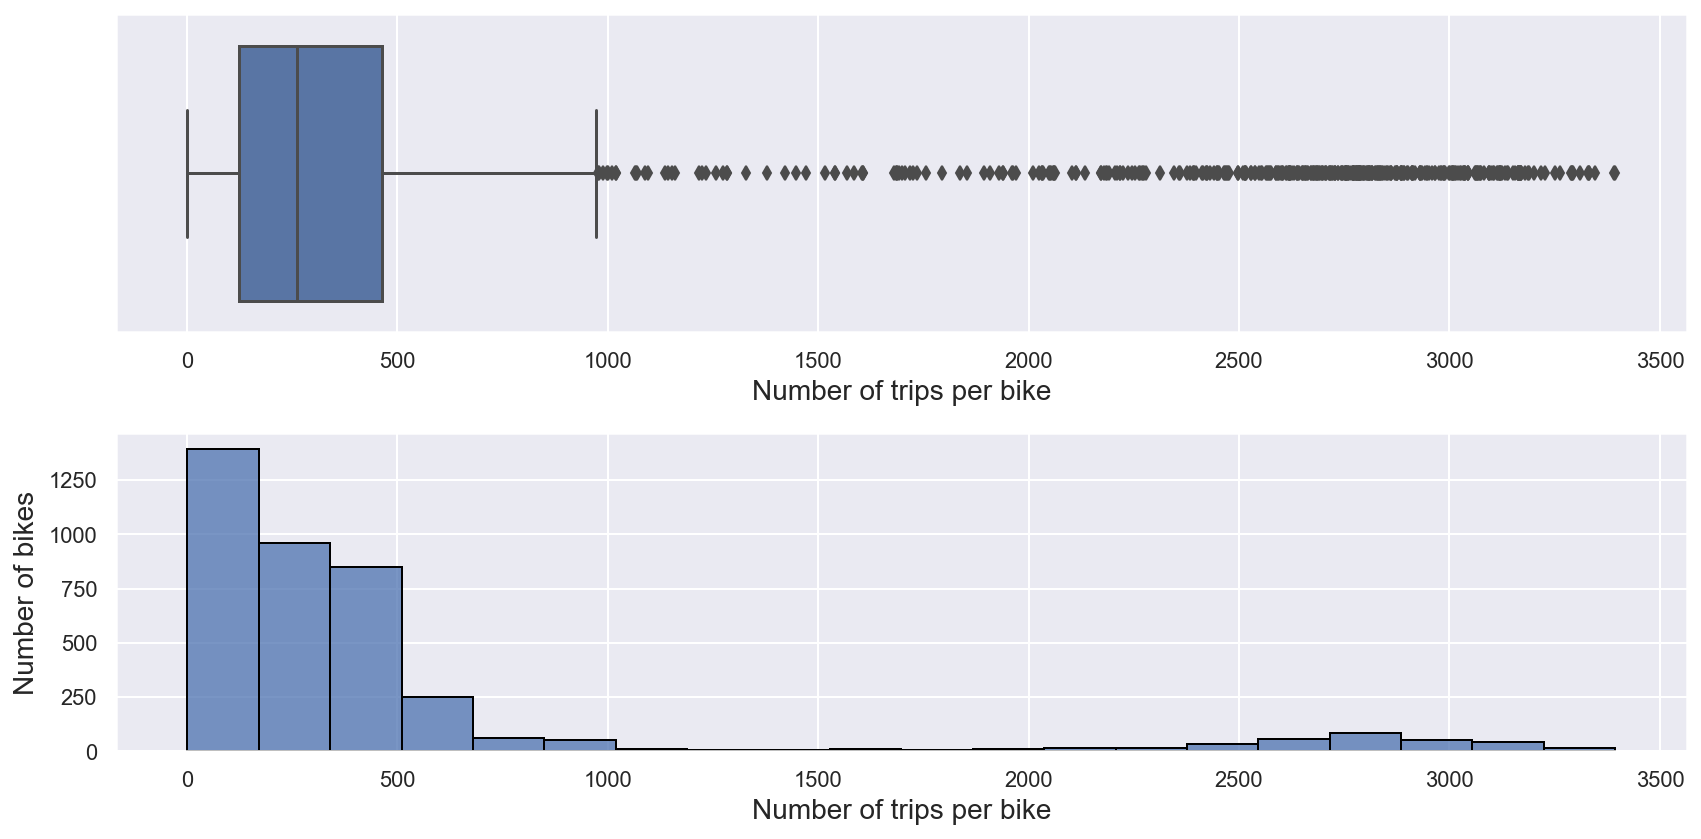

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

## Data
data=query_to_df(query)

## Boxplot
sns.boxplot(x=data['num_trips'], ax=ax1)
ax1.set_xlabel('Number of trips per bike', fontsize=14)

## Histogram - Distribution
sns.histplot(data['num_trips'], bins=20, ec='black', ax=ax2)
ax2.set_xlabel('Number of trips per bike', fontsize=14)
ax2.set_ylabel('Number of bikes', fontsize=14)

plt.tight_layout();

`Distribution is not normal & evidence of two different groups in the dataset. 1) A group of bikes that are used less than 1500 times & 2) a second group of bikes with a normal looking distribution centered around 2750.`

`Consider the difference between the two groups - are they located in different areas / on different routes? Do they have less miles recorded & it is just a case of more frequent rides?`

### ***

#### 3-3. Query: View the average ride time between the two groups

__`Table: bikeshare_trips`__
- duration_sec: Time of trip in seconds
- trip_id: Numeric ID of bike trip
- bike_number: ID of bike used

In [18]:
## Average journey for bikes with 1500+ recorded trips
q1 = (
    """
    SELECT 
      bike_number AS bike_id,
      ROUND(AVG(duration_sec)/60, 5) AS avg_trip_min, 
      COUNT(trip_id) AS num_trips
    FROM bigquery-public-data.san_francisco_bikeshare.bikeshare_trips
    GROUP BY bike_number
    HAVING num_trips >= 1500
    ORDER BY num_trips DESC
    """)

query_to_df(q1).head(3)

,bike_id,avg_trip_min,num_trips
0,395,15.88093,3394
1,389,15.86015,3390
2,625,16.33242,3345


In [19]:
## Average journey for bikes with less than 1500 recorded trips
q2 = (
    """
    SELECT 
      bike_number AS bike_id,
      ROUND(AVG(duration_sec)/60, 5) AS avg_trip_min, 
      COUNT(trip_id) AS num_trips
    FROM bigquery-public-data.san_francisco_bikeshare.bikeshare_trips
    GROUP BY bike_number
    HAVING num_trips < 1500
    ORDER BY num_trips DESC
    """)

query_to_df(q2).head(3)

,bike_id,avg_trip_min,num_trips
0,626,17.19342,1471
1,132,24.23222,1447
2,367,14.16757,1420


In [20]:
## Statistics
round(query_to_df(q1).describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
bike_id,358.0,438.71,139.30,16.00,349.25,447.50,545.50,878.00
avg_trip_min,358.0,16.17,6.46,13.07,14.87,15.55,16.48,133.67
num_trips,358.0,2665.85,409.00,1517.00,2469.75,2754.00,2947.00,3394.00


In [21]:
## Statistics
round(query_to_df(q2).describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
bike_id,3594.0,2152.68,1090.07,9.00,1276.25,2175.50,3076.75,4073.00
avg_trip_min,3594.0,16.91,5.59,3.86,13.59,15.84,18.87,86.21
num_trips,3594.0,276.31,205.04,1.00,114.25,230.50,416.00,1471.00


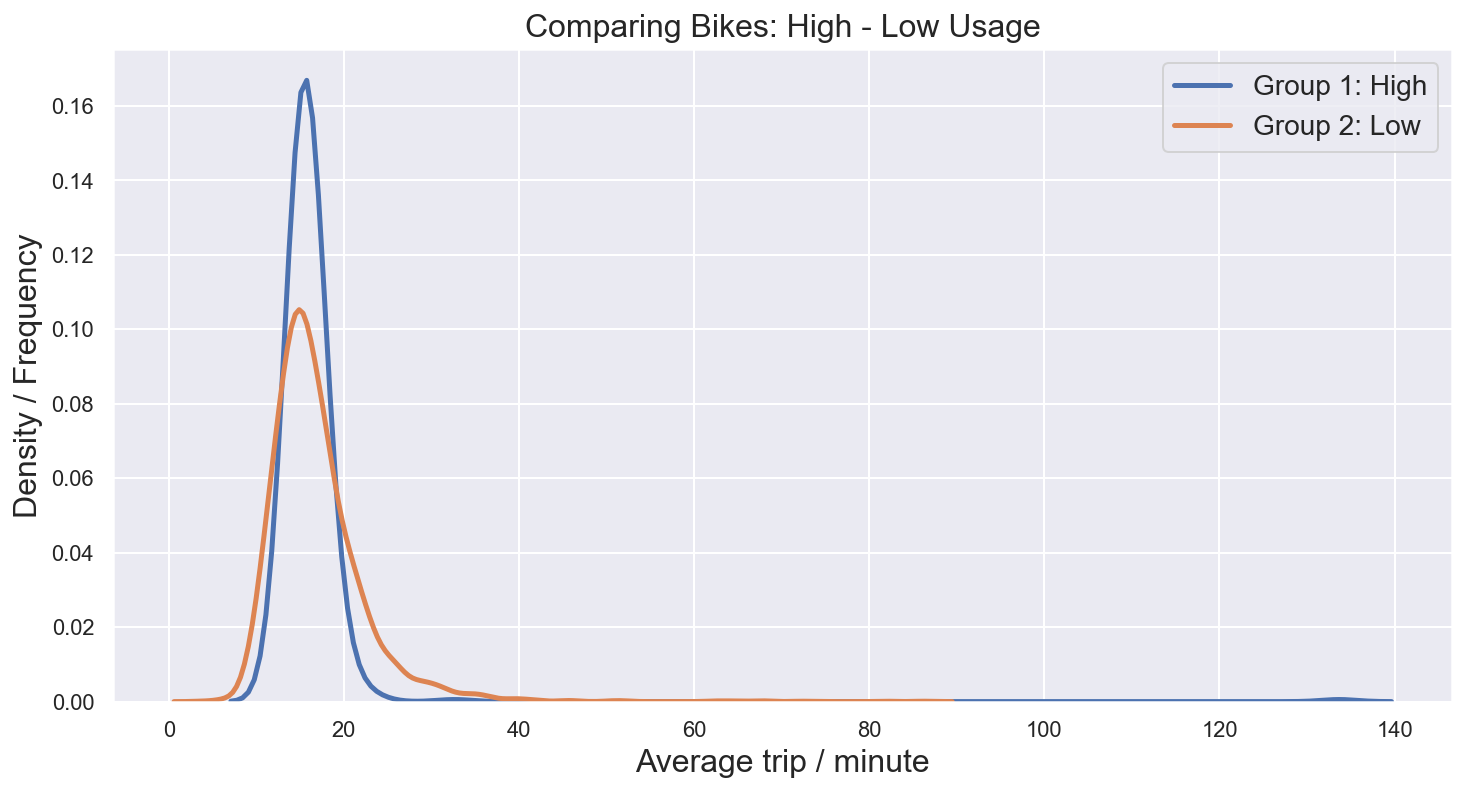

In [22]:
## Plot
plt.figure(figsize=(12, 6))

## Data
group1 = query_to_df(q1)
group2 = query_to_df(q2)

## KDE
sns.kdeplot(data=group1, x='avg_trip_min', shade=False, label='Group 1: High', lw=2.5)
sns.kdeplot(data=group2, x='avg_trip_min', shade=False, label='Group 2: Low', lw=2.5)

plt.title('Comparing Bikes: High - Low Usage', fontsize=16)
plt.legend(prop={'size':14})
plt.xlabel('Average trip / minute', fontsize=16)
plt.ylabel('Density / Frequency', fontsize=16);

`High usage bikes have a much lower variance around the average trip length than bikes with a lower number of trips recorded. This supports the hypothesis that higher usage bikes are located in specific areas / taken on specific high-traffic routes (completed in roughly 17 minutes+).`

`After generating descriptive statistics for both groups, there are significantly more bikes in group 2 (3594) than in group 1 (358). The mean of both groups are very similar, however the standard deviations are less similar.`

`A T-test could be run to determine if the means are equal - however, with such a large sample size, it is unlikely to conclude a difference. However, journey route chosen may give an insight into the differences.`

### ***

#### 3-4. Query: Routes for high usage

`Table: bikeshare_trips`
- start_station_id: Numeric reference for start station
- end_station_id: Numeric reference for end station
- bike_number: ID of bike used
- trip_id: Numeric ID of bike trip

There a lot more bikes in group 2 (low usage) than in group 1 (high usage)

In [23]:
## Routes with the highest recorded journeys (between stations)
query1 = (
    """
    SELECT
      COUNT(trip_id) AS num_trips, 
      start_station_id, 
      end_station_id
    FROM bigquery-public-data.san_francisco_bikeshare.bikeshare_trips
    GROUP BY start_station_id, end_station_id
    ORDER BY num_trips DESC
    LIMIT 5
    """)

## Top 5 Routes (Start - End)
query_to_df(query1)

,num_trips,start_station_id,end_station_id
0,9162,50,60
1,8508,69,65
2,7628,61,50
3,6904,50,61
4,6894,60,74


In [24]:
## The number of trips between stations for each bike
query1 = (
    """
    SELECT
      COUNT(trip_id) AS num_trips, 
      start_station_id, 
      end_station_id, 
      bike_number
    FROM bigquery-public-data.san_francisco_bikeshare.bikeshare_trips
    GROUP BY start_station_id, end_station_id, bike_number
    ORDER BY bike_number
    """)

query_to_df(query1).head()

,num_trips,start_station_id,end_station_id,bike_number
0,2,13,9,9
1,2,10,9,9
2,1,7,9,9
3,6,2,9,9
4,1,8,11,9


In [25]:
## Group 1
query = (
    """
    SELECT
      SUM(num_trips) AS num_of_trips, 
      start_station_id, 
      end_station_id
    FROM
        -- Gives the number of trips between stations which the sum is calculated 
        (SELECT
           COUNT(trip_id) AS num_trips, 
           start_station_id, 
           end_station_id, 
           bike_number
         FROM bigquery-public-data.san_francisco_bikeshare.bikeshare_trips
         WHERE bike_number IN
             (SELECT 
                bike_number
              FROM
                  -- Gives the number of bikes with 1500+ trips recorded 
                  (SELECT
                     COUNT(trip_id) AS num_trips, 
                     bike_number
                   FROM bigquery-public-data.san_francisco_bikeshare.bikeshare_trips
                   GROUP BY bike_number
                   HAVING num_trips >= 1500
                   )
              )
         GROUP BY start_station_id, end_station_id, bike_number
         )
    GROUP BY start_station_id, end_station_id
    ORDER BY num_of_trips DESC
    LIMIT 25
    """)

## DataFrame
group1=query_to_df(query)
## Top 5
query_to_df(query).head()

,num_of_trips,start_station_id,end_station_id
0,8749,50,60
1,8168,69,65
2,7281,61,50
3,6601,50,61
4,6568,65,69


In [26]:
## Group 2
query = (
    """
    SELECT
      SUM(num_trips) AS num_of_trips, 
      start_station_id, 
      end_station_id
    FROM
        -- Gives the number of trips between stations which the sum is calculated 
        (SELECT
           COUNT(trip_id) AS num_trips, 
           start_station_id, 
           end_station_id, 
           bike_number
         FROM bigquery-public-data.san_francisco_bikeshare.bikeshare_trips
         WHERE bike_number IN
             (SELECT 
                bike_number
              FROM
                  -- Gives the number of bikes with 1500+ trips recorded 
                  (SELECT
                     COUNT(trip_id) AS num_trips, 
                     bike_number
                   FROM bigquery-public-data.san_francisco_bikeshare.bikeshare_trips
                   GROUP BY bike_number
                   HAVING num_trips < 1500
                   )
              )
         GROUP BY start_station_id, end_station_id, bike_number
         )
    GROUP BY start_station_id, end_station_id
    ORDER BY num_of_trips DESC
    LIMIT 25
    """)

## DataFrame
group2=query_to_df(query)
## Top 5
query_to_df(query).head()

,num_of_trips,start_station_id,end_station_id
0,4930,15,6
1,3758,28,27
2,3444,27,28
3,3129,4,2
4,3096,2,4


### ***

#### 3-5. Modify DataFrame for each group

- group1
- group2

In [27]:
## Group1
group1['route_code'] = group1.start_station_id.astype(str) + '_' + group1.end_station_id.astype(str)
## Group2
group2['route_code'] = group2.start_station_id.astype(str) + '_' + group2.end_station_id.astype(str)

In [28]:
display(group1.head(3), group2.head(3))

,num_of_trips,start_station_id,end_station_id,route_code
0,8749,50,60,50_60
1,8168,69,65,69_65
2,7281,61,50,61_50


,num_of_trips,start_station_id,end_station_id,route_code
0,4930,15,6,15_6
1,3758,28,27,28_27
2,3444,27,28,27_28


In [29]:
## Group1
group1['route_in_low_group'] = group1['route_code'].isin({'route_code': group2['route_code'].values.tolist()})

##
group1

,num_of_trips,start_station_id,end_station_id,route_code,route_in_low_group
0,8749,50,60,50_60,False
1,8168,69,65,69_65,False
2,7281,61,50,61_50,False
3,6601,50,61,50_61,False
4,6568,65,69,65_69,False
5,6557,60,74,60_74,False
6,6065,51,70,51_70,False
7,5930,70,50,70_50,False
8,5790,74,61,74_61,False
9,5714,74,70,74_70,False


`None of the top 25 routes for Group1: Bikes with high usage are in the top 25 routes for Group2: Bikes with low usage. A quick look reveals that bikes recording more journeys are using completely different routes than bikes that record less journeys.`  

`An important insight if certain bikes on certain routeese were experiencing more wear & tear than & required additional service / replacement. However, in this case a more indepth analysis on a station-by-station level rather than a route-level would provide much more of an insight.`

### ***

#### 3-6. Customer v Subscriber

`Table: bikeshare_trips`

- subscriber_type: Subscriber = annual or 30-day member; Customer = 24-hour or 3-day member

In [30]:
## Cumulative minutes spent on journey: subscribers v customers for year 2015
query = (
    """
  SELECT
    ROUND(SUM(CASE WHEN subscriber_type = 'Customer' THEN duration_sec/60 ELSE NULL END),2)/1000 AS custumor_mins,
    ROUND(SUM(CASE WHEN subscriber_type = 'Subscriber' THEN duration_sec/60 ELSE NULL END),2)/1000 AS subscriber_mins,
    EXTRACT(MONTH FROM end_date) AS end_month,
    EXTRACT(YEAR FROM end_date) AS end_year
  FROM bigquery-public-data.san_francisco_bikeshare.bikeshare_trips
  GROUP BY end_year, end_month
  HAVING end_year = 2015
  ORDER BY end_month, end_year
    """)

## 2015
query_to_df(query)

,custumor_mins,subscriber_mins,end_month,end_year
0,177.88107,238.79845,1,2015
1,202.80713,225.73225,2,2015
2,235.40207,271.59700,3,2015
3,184.91928,270.92942,4,2015
4,257.72168,276.01663,5,2015
5,554.46982,276.53478,6,2015
6,337.97048,263.75247,7,2015
7,256.80623,261.61962,8,2015
8,187.95278,262.13673,9,2015
9,184.59085,263.53577,10,2015


### ROUGH CODE

In [31]:
## TEST
query = (
    """
  SELECT
    ROUND(SUM(CASE WHEN subscriber_type = 'Customer' THEN duration_sec/60 ELSE NULL END),2)/1000 AS custumor_mins,
    ROUND(SUM(CASE WHEN subscriber_type = 'Subscriber' THEN duration_sec/60 ELSE NULL END),2)/1000 AS subscriber_mins,
    EXTRACT(MONTH FROM end_date) AS end_month,
    EXTRACT(YEAR FROM end_date) AS end_year
  FROM bigquery-public-data.san_francisco_bikeshare.bikeshare_trips
  GROUP BY end_year, end_month
  HAVING end_year = 2015
  ORDER BY end_month, end_year
    """)

## 2015
query_to_df(query).head()

,custumor_mins,subscriber_mins,end_month,end_year
0,177.88107,238.79845,1,2015
1,202.80713,225.73225,2,2015
2,235.40207,271.59700,3,2015
3,184.91928,270.92942,4,2015
4,257.72168,276.01663,5,2015


In [32]:
## TEST II
query = (
    """
  SELECT
    ROUND(SUM(CASE WHEN subscriber_type = 'Customer' THEN duration_sec/60 ELSE NULL END),2) AS custumor_mins,
    ROUND(SUM(CASE WHEN subscriber_type = 'Subscriber' THEN duration_sec/60 ELSE NULL END),2) AS subscriber_mins,
    EXTRACT(MONTH FROM end_date) AS end_month,
    EXTRACT(YEAR FROM end_date) AS end_year
  FROM bigquery-public-data.san_francisco_bikeshare.bikeshare_trips
  GROUP BY end_year, end_month
  HAVING end_year = 2015
  ORDER BY end_month, end_year
    """)

## 2015
query_to_df(query).head()

,custumor_mins,subscriber_mins,end_month,end_year
0,177881.07,238798.45,1,2015
1,202807.13,225732.25,2,2015
2,235402.07,271597.00,3,2015
3,184919.28,270929.42,4,2015
4,257721.68,276016.63,5,2015


In [33]:
## TEST III
q4 = '''
SELECT
  SUM(customer_minutes_sum) OVER (ORDER BY end_month ROWS UNBOUNDED PRECEDING)/100 as cumulative_minutes_cust,
  SUM(subscriber_minutes_sum) OVER (ORDER BY end_month ROWS UNBOUNDED PRECEDING) as cumulative_minutes_sub,
  end_year,
  end_month
FROM
  (
  SELECT
    SUM(CASE WHEN subscriber_type = 'Customer' THEN duration_sec/60 ELSE NULL END) AS customer_minutes_sum,
    SUM(CASE WHEN subscriber_type = 'Subscriber' THEN duration_sec/60 ELSE NULL END) AS subscriber_minutes_sum,
    EXTRACT(YEAR FROM end_date) AS end_year,
    EXTRACT(MONTH FROM end_date) AS end_month
  FROM
    `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips`
  GROUP BY
    end_year, end_month
  HAVING
    end_year = 2015
  )
ORDER BY
  end_year, end_month
'''
query_to_df(q4).head()

,cumulative_minutes_cust,cumulative_minutes_sub,end_year,end_month
0,1778.810667,2.387985e+05,2015,1
1,3806.882000,4.645307e+05,2015,2
2,6160.902667,7.361277e+05,2015,3
3,8010.095500,1.007057e+06,2015,4
4,10587.312333,1.283074e+06,2015,5


In [34]:
q4 = '''
SELECT
  SUM(customer_minutes_sum) OVER (ORDER BY end_month ROWS UNBOUNDED PRECEDING)/1000 as cumulative_minutes_cust,
  SUM(subscriber_minutes_sum) OVER (ORDER BY end_month ROWS UNBOUNDED PRECEDING)/100 as cumulative_minutes_sub,
  end_year,
  end_month
FROM
  (
  SELECT
    SUM(CASE WHEN subscriber_type = 'Customer' THEN duration_sec/60 ELSE NULL END) AS customer_minutes_sum,
    SUM(CASE WHEN subscriber_type = 'Subscriber' THEN duration_sec/60 ELSE NULL END) AS subscriber_minutes_sum,
    EXTRACT(YEAR FROM end_date) AS end_year,
    EXTRACT(MONTH FROM end_date) AS end_month
  FROM
    `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips`
  GROUP BY
    end_year, end_month
  HAVING
    end_year = 2015
  )
ORDER BY
  end_year, end_month
'''
query_to_df(q4)

,cumulative_minutes_cust,cumulative_minutes_sub,end_year,end_month
0,177.881067,2387.984500,2015,1
1,380.688200,4645.307000,2015,2
2,616.090267,7361.277000,2015,3
3,801.009550,10070.571167,2015,4
4,1058.731233,12830.737500,2015,5
5,1613.201050,15596.085333,2015,6
6,1951.171533,18233.610000,2015,7
7,2207.977767,20849.806167,2015,8
8,2395.930550,23471.173500,2015,9
9,2580.521400,26106.531167,2015,10


[Return to contents](#sections)